In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Задача 1
По метода на най-малките квадрати да се намери парабола, която приближава таблицата:

|x| -2 | -1 | 0 | 1 | 2 | 3
|---|---|---|---|---|---|---|
|y|7|1| 0| 1| 7| 14|

{a: 93/56, b: -33/280, c: -1/5}


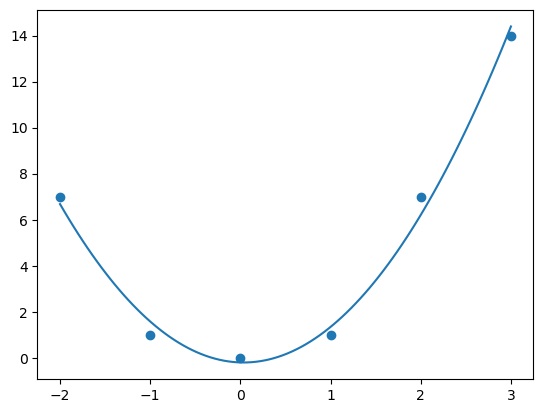

In [23]:
a,b,c = sp.symbols('a,b,c')
x = np.linspace(-2, 3, 100)
# def f(x, a, b, c):
#     a*x**2 + b*x+c
def phi(nodes,values, a ,b ,c):
    sum = 0
    for i in range(len(nodes)):
        sum += (a*nodes[i]**2 + b*nodes[i]+c - values[i])**2
    return sum
        
nodes = np.array([-2,-1,0,1,2,3])
values = np.array([7,1,0,1,7,14])

a1 = sp.diff(phi(nodes, values, a,b,c), a)
a2 = sp.diff(phi(nodes, values,a,b,c), b)
a3 = sp.diff(phi(nodes, values,a,b,c), c)

solution=sp.solve([sp.Eq(a1, 0), sp.Eq(a2, 0), sp.Eq(a3, 0)])
print(solution)
#plt.plot(x, f(x, a2,b2,c2))
def f(x, solution):
    return solution[a]*x**2 + solution[b]*x+solution[c]

plt.scatter(nodes, values)
plt.plot(x, f(x, solution))

    

### Задача 2
Във файла *CO_2_data.csv* се съдръжат данни за нивата на въглеродния диоксид в атмосферата (в млрд. тонове) за периода 1940-2022г. По метода на най-малките квадрати да се построи линейна функция, която приближава данните.

*Източник: https://www.statista.com/statistics/276629/global-co2-emissions/*

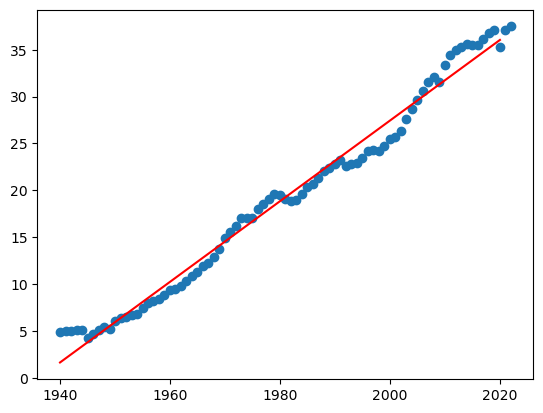

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
x = np.linspace(1940, 2020, 1000)
df = pd.read_csv('CO_2_data.csv') #create data frame
years = df.loc[:, "year"]
co2 = df.loc[:, "co2"]
plt.scatter(years,co2);

def phi(years,co2, a, b):
    sum = 0
    for i in range(len(years)):
        sum += (a*years[i] + b - co2[i])**2
    return sum

a1 = sp.diff(phi(years, co2,a,b), a)
a2 = sp.diff(phi(years, co2,a,b), b)

solution = sp.solve([sp.Eq(a1,0), sp.Eq(a2, 0)])

def f(x, solution):
    return solution[a] * x + solution[b]
plt.plot(x, f(x, solution), color='red')


### Задача 3
Във файла *amazon_sales_net_revenue.csv* се съдръжат данни за годишния приход на Amazon в млрд. щатски долари за периода 2004 - 2021г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати, да се построи функция от вида $ f(x) = a e^{bx}$, която моделира данните.


*Източник: https://www.statista.com/statistics/266282/annual-net-revenue-of-amazoncom/*

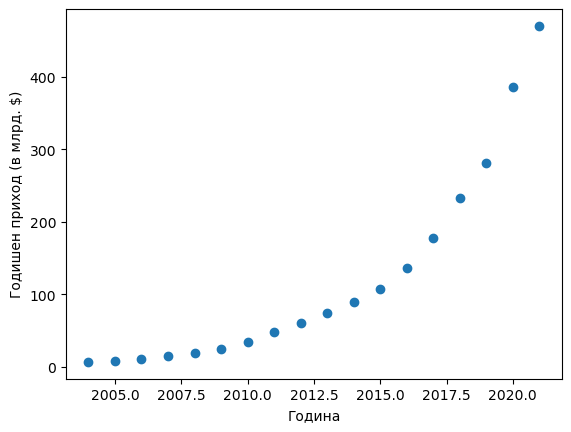

{a: -495.920992621591, b: 0.248452555378842}
1


TypeError: loop of ufunc does not support argument 0 of type Float which has no callable exp method

In [45]:
df = pd.read_csv('amazon_sales_net_revenue.csv')
years = df.loc[:, "year"]
revenue = df.loc[:, "revenue"]
plt.scatter(years, revenue)
plt.xlabel('Година')
plt.ylabel('Годишен приход (в млрд. $)')
plt.show()

x = np.linspace(2005, 2020, 100)
values = np.array([np.log(rev) for rev in revenue])

def phi(years,revenue, a, b):
    sum = 0
    for i in range(1,len(years)):
        sum += (b*years[i] + a - values[i])**2
    return sum

a1 = sp.diff(phi(years, values,a,b), a)
a2 = sp.diff(phi(years, values,a,b), b)

solution = sp.solve([sp.Eq(a1,0), sp.Eq(a2, 0)])
print(solution)
print(1)
def f(x, solution):
    return np.exp(solution[a]) * np.exp(solution[b]*x)
plt.plot(x, f(x, solution), color='red')




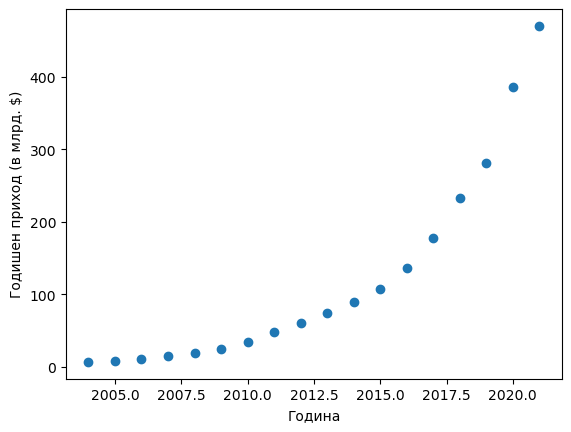

{a: -495.920992621591, b: 0.248452555378842}


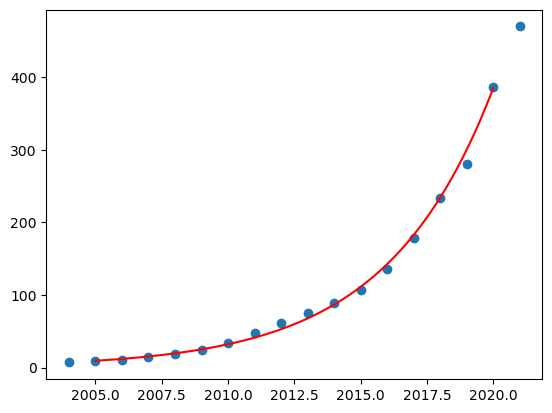

In [52]:
df = pd.read_csv('amazon_sales_net_revenue.csv')
years = df.loc[:, "year"]
revenue = df.loc[:, "revenue"]
plt.scatter(years, revenue)
plt.xlabel('Година')
plt.ylabel('Годишен приход (в млрд. $)')
plt.show()

x = np.linspace(2005, 2020, 100)
values = np.array([np.log(rev) for rev in revenue])

def phi(years,revenue, a, b):
    sum = 0
    for i in range(1,len(years)):
        sum += (b*years[i] + a - values[i])**2
    return sum

a1 = sp.diff(phi(years, values,a,b), a)
a2 = sp.diff(phi(years, values,a,b), b)

solution = sp.solve([sp.Eq(a1,0), sp.Eq(a2, 0)])
print(solution)
#print(np.exp(float(solution[a])))
def f(x, solution):
    return np.exp(float(solution[a])) * np.exp(float(solution[b])*x)
plt.plot(x, f(x, solution), color='red')
plt.scatter(years, revenue)


In [ ]:
# def f(x):
#     return  b*x + c

# def phi(x):
#     return sum([(f(i) - log(values[i])**2 for i in range(n)])
#vtori nachin

### Задача 4
Да се напише функция $\mathbf{least\_squares(x_values,y_values,n)}$, която по метода на най-малките квадрати намира полином от степен n за съответни данни (x_values,y_values). Последната  да определя полинома, като решава съответната линейна система. Да се приложи върху задача 1.

-0.0458333333123661*x**5 + 0.931818181396403*x**4 - 7.09659090594236*x**3 + 24.8333333226466*x**2 - 36.342424226397*x + 19.7142857061335


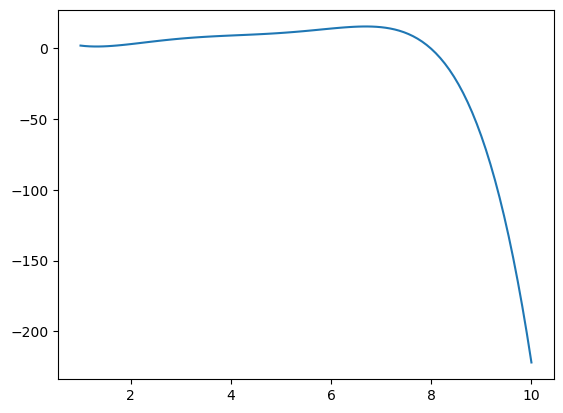

In [62]:
# def f(x, a):
#     sum = 0
#     for i in range(n+1):
#         sum += a[i]*x**(i)
#     return sum
# b
# for i in range(n+1):
#     b[i] = sp.diff(f(x, a), a[i])
# np.solve([sp.Eq(u) for u in b])

# def least_squares(x_nodes, y_values, n):
#     A = np.zeros([n])

# def f(x):
#     sum+=x**(i)*

x_values = np.array([1,2,3,4,5, 6,7])
y_values = np.array([2,3,7,9,11, 14, 15])
def sumX(s,nodes, power):
    return  sum([nodes[i]**power for i in range(s)])
    
def sumY(s, nodes, values, power):
    return sum([values[i] * nodes[i]**power for i in range(s)])
    
def least_squares(x_values, y_values, n):
    A = np.zeros([n+1, n+1])
    values = np.array([sumY(len(x_values), x_values, y_values, i) for i in range(n+1)])
    for i in range(n+1):
        for j in range(n+1):
            A[i][j] = sumX(len(x_values), x_values, i+j)
        
    a = np.linalg.solve(A, values)
    return a
n = 5
x=np.linspace(1, 10, 100)
a = least_squares(x_values,y_values, n)
def poly(x, a):
    pol = 0
    for i in range(n+1):
        pol += a[i] * x**i
    return pol
symX = sp.symbols('x')
f = poly(symX, a)
print(f)
plt.plot(x, poly(x,a))

### Допълнителна задача
Известно е, че връзката между скоростта на вятъра и генерираното количество електроенергия от една вятърна турбина може да се опише чрез кубична функция.Във файла *wind_turbine_data_sample.csv* се съдръжат измервания за количеството произведена електроенергия (kW) от конкретен вятърен генератор в зависимост от скоростта на вятъра (m/s).
Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи полином от трета степен, който приближава данните.

*Източник: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset/*

{a: -7.59606064982793, b: 205.917112180286, c: -1334.75406713179, d: 2787.95787856771}


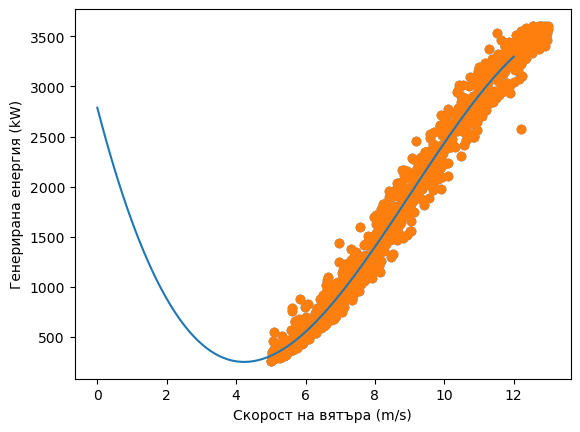

In [39]:
df = pd.read_csv('wind_turbine_data_sample.csv')
wind_speed = df.loc[:, "wind speed"]
power_output = df.loc[:, "power output"]
plt.scatter(wind_speed, power_output)
plt.xlabel('Скорост на вятъра (m/s)')
plt.ylabel('Генерирана енергия (kW)')

a,b,c,d = sp.symbols('a,b,c,d')
x = np.linspace(0,12 , 100)
# def f(x, a, b, c):
#     a*x**2 + b*x+c
#preporychitelno float(solution[a])
def phi(nodes,values, a ,b ,c, d):
    sum = 0
    for i in range(len(nodes)):
        sum += (a*nodes[i]**3 + b*nodes[i]**2+c*nodes[i] +d - values[i])**2
    return sum

a1 = sp.diff(phi(wind_speed, power_output, a,b,c,d), a)
a2 = sp.diff(phi(wind_speed, power_output,a,b,c,d), b)
a3 = sp.diff(phi(wind_speed, power_output,a,b,c,d), c)
a4 = sp.diff(phi(wind_speed, power_output,a,b,c,d), d)


solution=sp.solve([sp.Eq(a1, 0), sp.Eq(a2, 0), sp.Eq(a3, 0), sp.Eq(a4, 0)])
print(solution)
#plt.plot(x, f(x, a2,b2,c2))
def f(x, solution):
    return solution[a]*x**3 + solution[b]*x**2+solution[c]*x+solution[d]

plt.scatter(wind_speed, power_output)
plt.plot(x, f(x, solution))

    


plt.show()